# Chapter 4
## Numpy Arrays

In [1]:
import numpy as np

square = np.array(
    [[1,2,3,4,5],
     [6,7,8,9,10],
     [11,12,13,14,15],
     [16,17,18,19,20],
     [21,22,23,24,25]]
)

size=5

In [2]:
# This one is a bit hard to hold in the head - it's really easy to get the indexes wrong
spiral = []

for i in range(0, size):
    # Convert each part marked by any red arrow to a list
    spiral += list(square[i, i:size-i])
    
    # Convert each part marked by any green arrow to a list
    spiral += list(square[i+1:size-i, size-i-1])
    
    # Convert each part marked by any blue arrow to a list
    spiral += list(reversed(square[size-i-1, i:size-i-1]))
    
    # Convert each part marked by any magenta arrow to a list
    spiral += list(reversed(square[i+1:size-i-1, i]))
        
print(spiral)

[1, 2, 3, 4, 5, 10, 15, 20, 25, 24, 23, 22, 21, 16, 11, 6, 7, 8, 9, 14, 19, 18, 17, 12, 13]


In [3]:
input_list1 = [[1,2,3], [4,5,6], [7,8,9]]
input_array1 = np.array(input_list1)

# Substitute the code in the block 1 given the input_array1
output_array1 = input_array1 * 5 
print(list(map(lambda x: [5*i for i in x], input_list1)))
print(output_array1)

[[5, 10, 15], [20, 25, 30], [35, 40, 45]]
[[ 5 10 15]
 [20 25 30]
 [35 40 45]]


In [4]:
input_list2 = list(range(10))
input_array2 = np.array(input_list2)

In [5]:
# Substitute the code in the block 2 given the input_array2
output_array2 = input_array2[input_array2 % 2 == 0]
print(list(filter(lambda x: x % 2 == 0, input_list2)))
print(output_array2)

[0, 2, 4, 6, 8]
[0 2 4 6 8]


In [6]:
input_list3 = []
row = []
for i in range(1,7):
    row.append(i)
    if len(row) == 2:
        input_list3.append(row)
        row = []
print(input_list3)

input_array3 = np.array(input_list3)

[[1, 2], [3, 4], [5, 6]]


In [7]:
# Substitute the code in the block 3 given the input_array3
output_array3 = input_array3 ** 2
print([[i*i for i in j] for j in input_list3])
print(output_array3)

[[1, 4], [9, 16], [25, 36]]
[[ 1  4]
 [ 9 16]
 [25 36]]


## Dataframe

In [8]:
from functools import reduce
import pandas as pd

from urllib.request import urlretrieve
url = 'https://assets.datacamp.com/production/repositories/4298/datasets/d77902052165a763cc4bc84e2457e1f41e80d233/exams.csv'
file = 'exams.csv'
urlretrieve(url, file)

scores = pd.read_csv(file)

In [9]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       100 non-null    object
 1   race/ethnicity               100 non-null    object
 2   parental level of education  100 non-null    object
 3   lunch                        100 non-null    object
 4   test preparation course      100 non-null    object
 5   math score                   100 non-null    int64 
 6   reading score                100 non-null    int64 
 7   writing score                100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [10]:
groups_to_consider = ['gender',
                      'race/ethnicity',
                      'parental level of education',
                      'lunch',
                      'test preparation course']

In [11]:
def prevalence(series):
    vals = list(series)
    # Create a tuple list with unique items and their counts
    itms = [(x, series.value_counts()[x]) for x in set(series)]
    
    # Extract a tuple with the highest counts using reduce()
    res = reduce(lambda x, y: x if x[1] > y[1] else y, itms)
    
    # Return the item with the highest counts
    return res[0]
    
result = scores[groups_to_consider].apply(prevalence)
print(result)

gender                               female
race/ethnicity                      group C
parental level of education    some college
lunch                              standard
test preparation course                none
dtype: object


In [12]:
def rank(series):
    # Calculate the mean of the input series
    mean = series.mean()
    # Return the mean and its rank as a list
    if mean <= 60:
        return [mean, 'low']
    if mean > 90:
        return [mean, 'high']
    return [mean, 'medium']

In [13]:
# Insert the output of rank() into new columns of scores
cols = ['math score', 'reading score', 'writing score']
scores[['mean', 'rank']] = scores[cols].apply(rank, axis=1, result_type='expand')
print(scores[['mean', 'rank']].head())

        mean    rank
0  80.666667  medium
1  48.666667     low
2  47.666667     low
3  91.666667    high
4  82.333333  medium


In [14]:
def rescale(series, low, high):
    # Define the expression to rescale input series
    return (series/100 * (high-low)) + low

cols = ['math score', 'reading score', 'writing score']
scores[cols] = scores[cols].apply(rescale, args=[1,10], axis=1, result_type='expand')
print(scores[cols].head())

   math score  reading score  writing score
0        7.66           8.74           8.38
1        4.96           5.41           5.77
2        5.86           5.14           4.87
3        8.92           9.55           9.28
4        8.65           8.29           8.29


In [15]:
def rescale(series, low=0, high=100):
    # Define the expression to rescale input series
    return (series/100 * (high-low)) + low

cols = ['math score', 'reading score', 'writing score']
scores[cols] = scores[cols].apply(rescale, args=[1,10], axis=1, result_type='expand')
print(scores[cols].head())

   math score  reading score  writing score
0      1.6894         1.7866         1.7542
1      1.4464         1.4869         1.5193
2      1.5274         1.4626         1.4383
3      1.8028         1.8595         1.8352
4      1.7785         1.7461         1.7461


### Groupby

In [16]:
url = 'https://assets.datacamp.com/production/repositories/4298/datasets/203ff6d8dd61bede3cbac6fffdd77a222177f478/diabetes.csv'
file = 'diabetes.csv'
urlretrieve(url, file)

('diabetes.csv', <http.client.HTTPMessage at 0x7f7a4e1b9850>)

In [17]:
# Load the data from the diabetes.csv file
diabetes = pd.read_csv(file)
print(diabetes.info())

# Calculate the mean glucose level in the entire dataset
print(diabetes['plasma glucose'].mean())

# Group the data according to the diabetes test results
diabetes_grouped = diabetes.groupby('test result')

# Calculate the mean glucose levels per group
print(diabetes_grouped.agg('mean')['plasma glucose'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   n pregnant         768 non-null    int64  
 1   plasma glucose     763 non-null    float64
 2   blood pressure     733 non-null    float64
 3   skin thickness     541 non-null    float64
 4   serum insulin      394 non-null    float64
 5   bmi                757 non-null    float64
 6   pedigree function  768 non-null    float64
 7   age                768 non-null    int64  
 8   test result        768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB
None
121.6867627785059
test result
negative    110.643863
positive    142.319549
Name: plasma glucose, dtype: float64


In [25]:
url = 'https://assets.datacamp.com/production/repositories/4298/datasets/58a461693fbca1f972a11024c3873004b102160c/heroes_information.csv'
file = 'heroes.csv'
urlretrieve(url, file)
heroes = pd.read_csv(file, index_col=0)
heroes.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [26]:
for col in ['Weight', 'Height']:
    idx = heroes[col] < 0
    heroes.loc[idx, col] = np.nan

heroes['bmi'] = heroes['Weight'] / (heroes['Height']/100)**2

heroes.describe()

,Height,Weight,bmi
count,517.000000,495.000000,490.000000
mean,186.726306,112.252525,38.549328
std,59.251895,104.151142,133.972903
min,15.200000,2.000000,0.081400
25%,173.000000,61.000000,20.571429
50%,183.000000,81.000000,24.933720
75%,191.000000,108.000000,30.292078
max,975.000000,900.000000,2510.387812


In [54]:
import numpy as np

# Group the data by two factors specified in the context
groups = heroes.groupby(['Alignment', 'Publisher'])

# Filter groups having more than 10 valid bmi observations
fheroes = groups.filter(lambda df: df['bmi'].count() > 10)

# Group the filtered data again by the same factors
fgroups = fheroes.groupby(['Alignment', 'Publisher'])

# Calculate the mean and standard deviation of the BMI index
result = fgroups['bmi'].agg(['mean', 'std'])
print(result)

                              mean         std
Alignment Publisher                           
bad       DC Comics      71.460251  250.642060
          Marvel Comics  62.512261  258.935100
good      DC Comics      25.028215    6.879312
          Marvel Comics  28.968076   16.550686


In [72]:
imp_globmean = fheroes.copy()
imp_grpmean = fheroes.copy()

In [73]:
# Define a lambda function that imputes NaN values in series
impute = lambda series: series.fillna(series.mean())

# Impute NaNs in the bmi column of imp_globmean
imp_globmean['bmi'] = imp_globmean['bmi'].transform(impute)
print("Global mean = " + str(fheroes['bmi'].mean()) + "\n")

groups = imp_grpmean.groupby(['Publisher', 'Alignment'])

# Impute NaNs in the bmi column of imp_grpmean
imp_grpmean['bmi'] = groups['bmi'].transform(impute)
print(groups['bmi'].mean())

Global mean = 38.98033229674414

Publisher      Alignment
DC Comics      bad          71.460251
               good         25.028215
Marvel Comics  bad          62.512261
               good         28.968076
Name: bmi, dtype: float64


## Visualise Data

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
url = 'https://assets.datacamp.com/production/repositories/4298/datasets/d5ac8c46a84933e937927fba352f27d0b6b6291a/retinol.csv'
file = 'retinol.csv'
urlretrieve(url, file)
retinol = pd.read_csv(file)
retinol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                315 non-null    int64  
 1   gender             315 non-null    object 
 2   smoking            315 non-null    object 
 3   bmi                315 non-null    float64
 4   vitamin use        315 non-null    object 
 5   calories           315 non-null    float64
 6   fat                315 non-null    float64
 7   fiber              315 non-null    float64
 8   alcohol            315 non-null    float64
 9   cholesterol        315 non-null    float64
 10  diet B-carotene    315 non-null    int64  
 11  diet retinol       315 non-null    int64  
 12  plasma B-carotene  315 non-null    int64  
 13  plasma retinol     315 non-null    int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 34.6+ KB


In [85]:
retinol.corr()['plasma retinol']

age                  0.211672
bmi                  0.013139
calories            -0.073329
fat                 -0.090938
fiber               -0.044431
alcohol              0.017136
cholesterol         -0.070201
diet B-carotene     -0.013539
diet retinol        -0.062802
plasma B-carotene    0.071577
plasma retinol       1.000000
Name: plasma retinol, dtype: float64

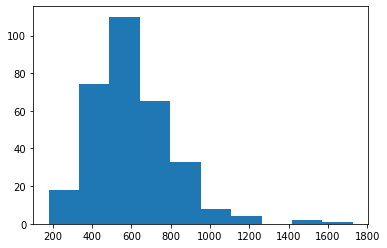

In [86]:
plt.hist(retinol['plasma retinol'])
plt.show()

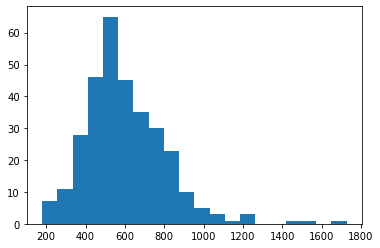

In [87]:
plt.hist(retinol['plasma retinol'], bins=20)
plt.show()

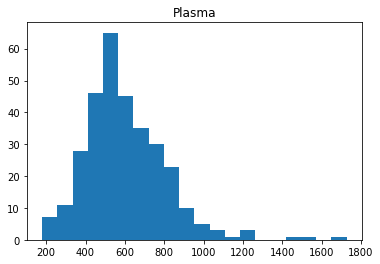

In [88]:
plt.hist(retinol['plasma retinol'], bins=20)

# Add a title to the plot
plt.title('Plasma')
plt.show()

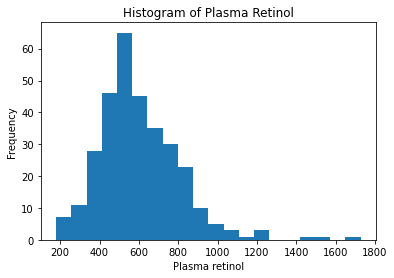

In [90]:
plt.hist(retinol['plasma retinol'], bins=20)
plt.title('Histogram of Plasma Retinol')

# Add other missing parts to the plot
plt.ylabel('Frequency')
plt.xlabel('Plasma retinol')
plt.show()

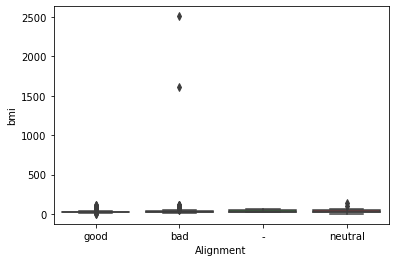

In [91]:
import seaborn as sns

sns.boxplot(data=heroes, x='Alignment', y='bmi')
plt.show()

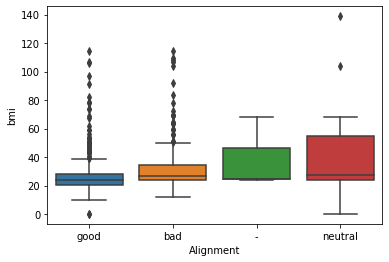

In [92]:
import seaborn as sns

# Select rows from heroes for which the BMI index < 1000
heroes_filtered = heroes['bmi'] < 1000

# Create a new boxplot of BMI indices
sns.boxplot(data=heroes[heroes_filtered], x='Alignment', y='bmi')
plt.show()